In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
print(tf.__version__)

2.13.0


# data preprocessing and split

In [2]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data = data.dropna()
data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
1,0.0,1000,-30,30,283,0.988,292.1,1.019,671.9,33.27,67.2,3.69,4.31,6.55,7.48,364,4.06,245.1,469.0,1.0
2,1.0,1000,-30,30,293,0.988,297.4,1.019,671.1,33.15,66.9,3.73,4.29,6.52,7.42,365.9,3.94,250.8,477.0,1.0
3,2.0,1000,-30,30,303,0.988,302.6,1.019,670.9,33.03,66.6,3.76,4.26,6.48,7.38,367.1,3.89,253.8,485.0,1.0
4,3.0,1000,-30,35,283,0.991,292.3,1.02,673.2,33.57,67.8,3.3,4.42,6.59,7.51,365.4,4.2,246.9,454.0,1.0
5,4.0,1000,-30,35,293,0.991,297.4,1.02,672.2,33.44,67.5,3.34,4.39,6.55,7.46,367.5,4.05,253.2,461.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [3]:
len_0 = len(data.loc[data['Knocking'] == 0])
len_1 = len(data.loc[data['Knocking'] == 1])
print(len_0)
print(len_1)

1064
1081


In [4]:
X_data = data.loc[:, ['Engine Speed', 'Spark Timing', 'Throttle Angle', 'Ambient Temperature', 
                                   'Intake Pressure', 'Intake Temperature','Exhaust Pressure', 'Exhaust Temperature', 'Injected Mass']]
y_data = data['Knocking']
print(X_data)
print(y_data)

     Engine Speed Spark Timing Throttle Angle Ambient Temperature   
1            1000          -30             30                 283  \
2            1000          -30             30                 293   
3            1000          -30             30                 303   
4            1000          -30             35                 283   
5            1000          -30             35                 293   
...           ...          ...            ...                 ...   
2141         6000          -10             85                 293   
2142         6000          -10             85                 303   
2143         6000          -10             90                 283   
2144         6000          -10             90                 293   
2145         6000          -10             90                 303   

     Intake Pressure Intake Temperature Exhaust Pressure Exhaust Temperature   
1              0.988              292.1            1.019               671.9  \
2          

In [5]:
train_input, test_input, train_output, test_output = train_test_split(X_data, y_data,test_size=0.2, shuffle=True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42) # train, validation, test 비율 조정, 함수 만들어 보기
print(train_input.shape)
print(train_output.shape)
print(val_input.shape)
print(val_output.shape)
print(test_input.shape)
print(test_output.shape)


(1287, 9)
(1287,)
(429, 9)
(429,)
(429, 9)
(429,)


In [6]:

ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale = ss.transform(val_input)
test_scale = ss.transform(test_input)
print(train_scale)
print(val_scale)
print(test_scale)

[[ 0.94116682 -1.42752381 -0.27742293 ...  0.8590414   0.36974684
   0.96453667]
 [ 1.57418573 -1.42752381 -0.80834236 ...  1.1903374   0.59817701
   0.32597037]
 [ 0.3081479  -0.01318729  0.78441592 ...  0.3068814   0.39817806
   0.87128571]
 ...
 [ 1.57418573  1.40114924 -1.07380208 ...  1.58053047  2.0579733
   0.10500616]
 [-1.27439938 -0.72035555  0.78441592 ... -1.15082099 -1.44789072
  -1.15185449]
 [-0.95788993 -0.72035555  0.78441592 ... -1.01094046 -0.7988745
  -0.74438837]]
[[-1.27439938  1.40114924 -1.33926179 ... -1.12873459 -0.8371096
  -1.51269512]
 [-1.59090884  1.40114924  0.51895621 ... -1.32015006 -1.63710542
  -1.84515504]
 [-0.95788993 -1.42752381 -1.33926179 ... -1.03302686 -0.93024637
  -0.91264552]
 ...
 [-0.95788993 -1.42752381 -0.27742293 ... -1.02566473 -0.88122701
  -0.80520421]
 [ 1.57418573 -0.72035555 -1.33926179 ...  0.94002487  0.77562707
  -0.35719421]
 [-0.32487101 -0.72035555 -0.27742293 ... -0.488229   -0.31848486
   0.2408282 ]]
[[ 0.3081479   1.40

# DNN Model 

In [7]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape = (9,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

2024-03-21 16:35:33.440552: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-21 16:35:33.440583: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-21 16:35:33.440589: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-21 16:35:33.440630: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-21 16:35:33.440657: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2021 (7.89 KB)
Trainable params: 2021 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
'''
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
'''

'\ninitial_learning_rate = 0.01\nlr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(\n    initial_learning_rate,\n    decay_steps=100000,\n    decay_rate=0.96,\n    staircase=True)\n'

In [9]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-classification-model.h5')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_scale, train_output, epochs=10000, batch_size = 64, validation_data=(val_scale, val_output), callbacks=[callback, checkpoint_cb])


Epoch 1/10000


2024-03-21 16:35:34.246032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - ETA: 0s - loss: 0.5052 - accuracy: 0.7319

2024-03-21 16:35:38.616355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 5s 113ms/step - loss: 0.5052 - accuracy: 0.7319 - val_loss: 0.3401 - val_accuracy: 0.8368
Epoch 2/10000
10/21 [=============>................] - ETA: 0s - loss: 0.3447 - accuracy: 0.8344

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 0s 16ms/step - loss: 0.3194 - accuracy: 0.8477 - val_loss: 0.2626 - val_accuracy: 0.9044
Epoch 3/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.2504 - accuracy: 0.8904 - val_loss: 0.2294 - val_accuracy: 0.9114
Epoch 4/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.2321 - accuracy: 0.8998 - val_loss: 0.2090 - val_accuracy: 0.9068
Epoch 5/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.2138 - accuracy: 0.9083 - val_loss: 0.1980 - val_accuracy: 0.9068
Epoch 6/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.2130 - accuracy: 0.8959 - val_loss: 0.1928 - val_accuracy: 0.8998
Epoch 7/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.2084 - accuracy: 0.9083 - val_loss: 0.1885 - val_accuracy: 0.8974
Epoch 8/10000
21/21 [==============================] - 0s 15ms/step - loss: 0.2298 - accuracy: 0.8990 - val_loss: 0.1819 - val_accuracy: 0.9068
Epoch 

In [10]:
model.save('best-classification-model.h5')
model = keras.models.load_model('best-classification-model.h5')

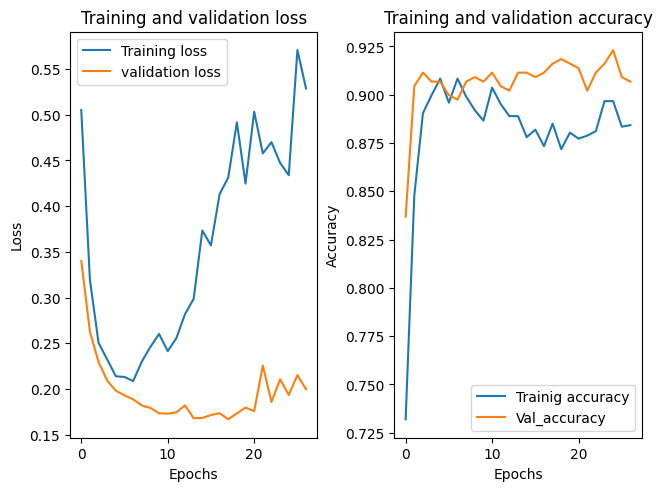

In [11]:
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']
accuracy = history_dic['accuracy']
val_accuracy = history_dic['val_accuracy']
fig, axs= plt.subplots(1, 2, constrained_layout = True)
axs[0].plot(loss, label = 'Training loss')
axs[0].plot(val_loss, label = 'validation loss')
axs[1].plot(accuracy, label = 'Trainig accuracy')
axs[1].plot(val_accuracy, label = 'Val_accuracy')
axs[0].set_title('Training and validation loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[1].set_title('Training and validation accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[0].legend()
axs[1].legend()
plt.show()
# loss값 파일 저장 및 출력 필요


In [12]:
loss_accuracy_df = pd.DataFrame(((loss[i], val_loss[i], accuracy[i], val_accuracy[i]) for i in range(len(history.epoch))), columns=['Loss', 'Val_Loss', 'Accuracy', 'Val_Accuracy'])
loss_accuracy_df

,Loss,Val_Loss,Accuracy,Val_Accuracy
0,0.505192,0.340126,0.731935,0.836830
1,0.319357,0.262627,0.847708,0.904429
2,0.250379,0.229444,0.890443,0.911422
3,0.232127,0.208952,0.899767,0.906760
4,0.213771,0.197967,0.908314,0.906760
5,0.213004,0.192772,0.895882,0.899767
6,0.208431,0.188520,0.908314,0.897436
7,0.229793,0.181858,0.898990,0.906760
8,0.245951,0.179092,0.891997,0.909091
9,0.260134,0.173265,0.886558,0.906760


In [13]:
loss_accuracy_df.to_csv('loss_and_accuracy.csv', index=True)

In [14]:
loss_and_accuracy_test = model.evaluate(test_scale, test_output)
loss_and_accuracy_train = model.evaluate(train_scale, train_output)
loss_and_accuracy_val = model.evaluate(val_scale, val_output)
print(loss_and_accuracy_test)
print(loss_and_accuracy_train)
print(loss_and_accuracy_val)
print('loss = ', loss_and_accuracy_test[0])
print('loss = ', loss_and_accuracy_train[0])
print('loss = ', loss_and_accuracy_val[0])
print('accuracy = ', loss_and_accuracy_train[1])
print('accuracy = ', loss_and_accuracy_val[1])
print('accuracy = ', loss_and_accuracy_test[1])

10/14 [====================>.........] - ETA: 0s - loss: 0.1627 - accuracy: 0.9312

2024-03-21 16:35:47.605977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 6ms/step - loss: 0.1885 - accuracy: 0.8974
[0.184752956032753, 0.9137529134750366]
[0.16883981227874756, 0.9254079461097717]
[0.1885196417570114, 0.8974359035491943]
loss =  0.184752956032753
loss =  0.16883981227874756
loss =  0.1885196417570114
accuracy =  0.9254079461097717
accuracy =  0.8974359035491943
accuracy =  0.9137529134750366


In [15]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)


30/41 [====================>.........] - ETA: 0s

2024-03-21 16:35:48.415790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 2ms/step


0.9121
0.9222
0.9013


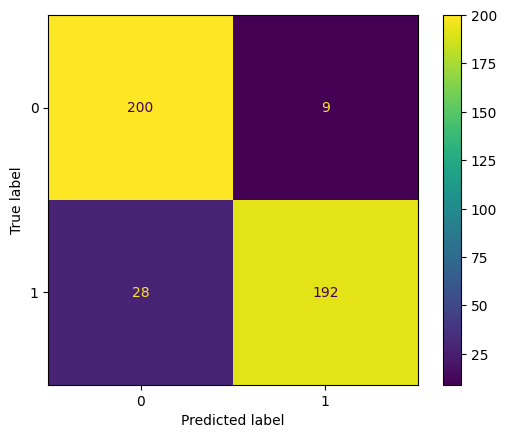

In [16]:
#Confusion matrix
predicted_test = np.array([1 if x >= 0.5 else 0 for x in predicted_test])
predicted_train = np.array([1 if x >= 0.5 else 0 for x in predicted_train])
predicted_val = np.array([1 if x >= 0.5 else 0 for x in predicted_val])

actual_test = np.array(test_output)
actual_train = np.array(train_output)
actual_val = np.array(val_output)

conf_matrix = confusion_matrix(actual_test, predicted_test)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()

#f1-score
print(round(f1_score(actual_test, predicted_test), 4))
print(round(f1_score(actual_train, predicted_train), 4))
print(round(f1_score(actual_val, predicted_val), 4))

In [17]:
print(predicted_test)
print(predicted_train)
print(predicted_val)

[0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0]
[1 1 0 ... 0 1 1]
[0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0

In [18]:
test_df = pd.DataFrame(((predicted_test[i]) for i in range(len(test_output))), columns=['Predicted_test'], index = test_output.index)
test_df['Raw_test'] = (test_output)
test_df

,Predicted_test,Raw_test
1345,0,0.0
1935,0,0.0
129,1,1.0
333,1,1.0
1164,0,0.0
...,...,...
545,1,1.0
1201,1,1.0
509,0,1.0
1333,0,0.0


In [19]:
train_df = pd.DataFrame(((predicted_train[i]) for i in range(len(train_output))), columns=['Predicted_train'], index = train_output.index)
train_df['Raw_train'] = (train_output)
train_df

,Predicted_train,Raw_train
1578,1,1.0
1962,1,0.0
1278,0,0.0
58,1,1.0
94,1,1.0
...,...,...
2109,0,0.0
471,1,1.0
2113,0,0.0
263,1,1.0


In [20]:
validation_df = pd.DataFrame(((predicted_val[i]) for i in range(len(val_output))), columns=['Predicted_val'], index = val_output.index)
validation_df['Raw_validation'] = (val_output)
validation_df

,Predicted_val,Raw_validation
356,0,1.0
181,1,1.0
395,1,1.0
1487,0,0.0
168,1,1.0
...,...,...
524,1,1.0
1137,0,0.0
407,1,1.0
1993,0,0.0


In [21]:
test_df.to_csv('Test_df.csv', index=True)
train_df.to_csv('Train_df.csv', index=True)
validation_df.to_csv('Validation_df.csv', index=True)

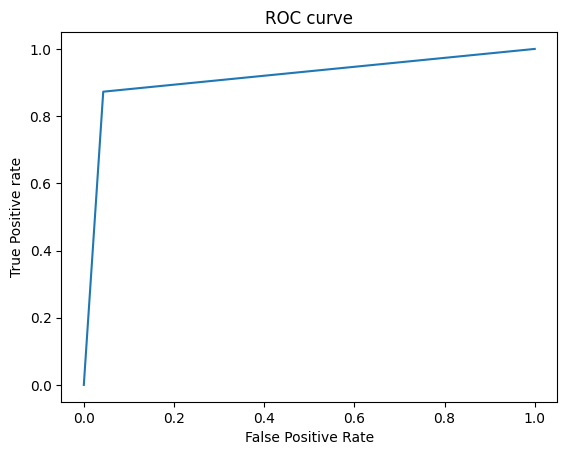

0.9148325358851674


In [22]:
#ROC CURVE
fpr, tpr, thresh = roc_curve(actual_test, predicted_test, pos_label=1)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()
    
#AUC    
auc_score1 = roc_auc_score(actual_test, predicted_test)
print(auc_score1)

In [23]:
print(round(recall_score(test_output, predicted_test), 4))
print(round(recall_score(train_output, predicted_train), 4))
print(round(recall_score(val_output, predicted_val), 4))

0.8727
0.9003
0.8777


In [24]:
print(round(precision_score(test_output, predicted_test), 4))
print(round(precision_score(train_output, predicted_train), 4))
print(round(precision_score(val_output, predicted_val), 4))

0.9552
0.9452
0.9263


In [25]:
data = [[round(loss_and_accuracy_test[0], 4), round(loss_and_accuracy_train[1], 4), round(recall_score(test_output, predicted_test), 4), round(precision_score(test_output, predicted_test), 4), round(f1_score(actual_test, predicted_test), 4)],
        [round(loss_and_accuracy_train[0], 4), round(loss_and_accuracy_train[1], 4),round(recall_score(train_output, predicted_train), 4), round(precision_score(train_output, predicted_train), 4), round(f1_score(actual_train, predicted_train), 4)],
        [round(loss_and_accuracy_val[0], 4), round(loss_and_accuracy_val[1], 4),round(recall_score(val_output, predicted_val), 4), round(precision_score(val_output, predicted_val), 4), round(f1_score(actual_val, predicted_val), 4)]]
index = ['Loss', 'Accuracy', 'Recall', 'Precision', 'F1_score']
print(data)


[[0.1848, 0.9254, 0.8727, 0.9552, 0.9121], [0.1688, 0.9254, 0.9003, 0.9452, 0.9222], [0.1885, 0.8974, 0.8777, 0.9263, 0.9013]]


In [26]:
metrics_df = pd.DataFrame(data, columns = index, index= ['Test', 'Train', 'Validation'])
metrics_df.to_csv('Binary_Classification_Metrics.csv')
metrics_df

,Loss,Accuracy,Recall,Precision,F1_score
Test,0.1848,0.9254,0.8727,0.9552,0.9121
Train,0.1688,0.9254,0.9003,0.9452,0.9222
Validation,0.1885,0.8974,0.8777,0.9263,0.9013


# Hyperparameters Tuning

In [27]:
'''
from sklearn.model_selection import ParameterGrid

# 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.1, 0.2, 0.3],
    'hidden_layers': [1, 2, 3],
    'hidden_units': [50, 100, 200],
    'batch_size' : [64, 32, 16]
}

# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행
best_accuracy = 0
best_params = {}
new_df = pd.DataFrame()

for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(params['hidden_units'], activation='relu', input_shape=(9,)))
    model.add(keras.layers.Dropout(params['dropout_rate']))
    
    for _ in range(params['hidden_layers']):
        model.add(keras.layers.Dense(params['hidden_units'], activation='relu'))
        model.add(keras.layers.Dropout(params['dropout_rate']))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, epochs=1000, batch_size=params['batch_size'], 
                        validation_data=(val_scale, val_output), 
                        callbacks=[callback, checkpoint_cb],
                        verbose=0)
    
    # 검증 세트에 대한 정확도 계산
    val_accuracy_and_loss = model.evaluate(val_scale, val_output, verbose=0)
    print("Validation loss :", val_accuracy_and_loss[0])
    print("Validation accuracy : ", val_accuracy_and_loss[1])

    data_params = [params['learning_rate'], params['dropout_rate'], params['hidden_layers'], params['hidden_units'], params['batch_size'], val_accuracy_and_loss[0], val_accuracy_and_loss[1]]
    params_df = pd.DataFrame({"Learning_Rate" : [params['learning_rate']], 'Dropout_Rate' : [params['dropout_rate']], "Hidden_units" : [params['hidden_units']], "Batch_size" : [params['batch_size']], "Validation_Loss" : [val_accuracy_and_loss[0]], "Validation_Accuracy" : [val_accuracy_and_loss[1]]})
    new_df = pd.concat([new_df, params_df], ignore_index = True)

    # 최적의 하이퍼파라미터와 정확도 업데이트
    if val_accuracy_and_loss[0] > best_accuracy:
        best_accuracy = val_accuracy_and_loss[0]
        best_params = params
model.save_weights('best-hyperparameters.h5')
    
print("Best parameters:", best_params)
print("Best validation accuracy:", best_accuracy)
'''


'\nfrom sklearn.model_selection import ParameterGrid\n\n# 하이퍼파라미터 그리드 정의\nparam_grid = {\n    \'learning_rate\': [0.001, 0.01, 0.1],\n    \'dropout_rate\': [0.1, 0.2, 0.3],\n    \'hidden_layers\': [1, 2, 3],\n    \'hidden_units\': [50, 100, 200],\n    \'batch_size\' : [64, 32, 16]\n}\n\n# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행\nbest_accuracy = 0\nbest_params = {}\nnew_df = pd.DataFrame()\n\nfor params in ParameterGrid(param_grid):\n    print("Training with parameters:", params)\n    \n    # 모델 생성\n    model = keras.Sequential()\n    model.add(keras.layers.Dense(params[\'hidden_units\'], activation=\'relu\', input_shape=(9,)))\n    model.add(keras.layers.Dropout(params[\'dropout_rate\']))\n    \n    for _ in range(params[\'hidden_layers\']):\n        model.add(keras.layers.Dense(params[\'hidden_units\'], activation=\'relu\'))\n        model.add(keras.layers.Dropout(params[\'dropout_rate\']))\n    \n    model.add(keras.layers.Dense(1, activation=\'sigmoid\'))\n    \n    # 모델 컴파일\n    optimizer = tf

In [28]:
new_df.to_csv('gridsearch_hyperparameters.csv')
data = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_accuracy]
grid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_Accuracy'])
grid_result.to_csv('GridSearch_Result')
print(grid_result)
print(new_df)


NameError: name 'new_df' is not defined

In [29]:
import random

param_randomsearch = {
    'hidden_layers': [],
    'hidden_units1': [],
    'hidden_units2': [],
    'hidden_units3': [],
    'hidden_units4': [],
    'hidden_units5': [],
    'dropout_rate1': [],
    'dropout_rate2': [],
    'dropout_rate3': [],
    'dropout_rate4': [],
    'dropout_rate5': [],
    'learning_rate': [],
    'batch_size' : [],
    'Validation_Loss' : [],
    'Validation_Accuracy' : []
    }

best_accuracy = 0
best_param_randomsearch = {}
new_randomsearch_df = pd.DataFrame(columns = ['hidden_layers', 'hidden_units1', 'hidden_units2', 'hidden_units3',  'hidden_units4','hidden_units5', 'dropout_rate1', 'dropout_rate2', 'dropout_rate3', 'dropout_rate4', 'dropout_rate5','learning_rate', 'batch_size',
                                              'Validation_Loss', 'Validation_Accuracy'])
print(new_randomsearch_df)
for _ in range(10):
    hidden_layers = random.randint(1, 4)
    hidden_units = random.randint(10, 200)
    dropout_rate = random.uniform(0.1, 0.4)
    learning_rate = random.uniform(0.1, 0.0001)
    batch_size = random.randint(8, 64)

    param_randomsearch['hidden_layers'].append(hidden_layers)
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hidden_units, activation='relu', input_shape=(9, )))
    param_randomsearch['hidden_units{}'.format(1)].append(hidden_units)
    model.add(keras.layers.Dropout(rate=dropout_rate))
    param_randomsearch['dropout_rate{}'.format(1)].append(dropout_rate)
    
    for i in range(hidden_layers):
        hidden_units_random = random.randint(10, 200)
        model.add(keras.layers.Dense(units = hidden_units_random, activation='relu'))
        param_randomsearch['hidden_units{0}'.format(i+2)].append(hidden_units_random)
        dropout_rate_random = random.uniform(0.1, 0.4)
        model.add(keras.layers.Dropout(rate=dropout_rate_random))
        param_randomsearch['dropout_rate{}'.format(i+2)].append(dropout_rate_random)
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    param_randomsearch['learning_rate'].append(learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, batch_size = batch_size, validation_data=(val_scale, val_output), epochs=1000, callbacks=[callback, checkpoint_cb], verbose=0)
    param_randomsearch['batch_size'].append(batch_size)
    
    # 검증 세트에 대한 평가
    val_accuracy_and_loss = model.evaluate(val_scale, val_output, verbose=0)
    print(param_randomsearch)
    print("Validation Loss :", val_accuracy_and_loss[0])
    print("Validation Accuracy :", val_accuracy_and_loss[1])

    param_randomsearch['Validation_Loss'].append(val_accuracy_and_loss[0])
    param_randomsearch['Validation_Accuracy'].append(val_accuracy_and_loss[1])
    
    param_randomsearch_df = pd.DataFrame()
    for key, value in param_randomsearch.items():
        param_randomsearch_df[key] = pd.Series(value, index=range(len(value)))
    
    #데이터 저장
    new_randomsearch_df = pd.concat([new_randomsearch_df, param_randomsearch_df], ignore_index = True)
    print(new_randomsearch_df)

    # 최적의 하이퍼파라미터와 MAE 업데이트
    if val_accuracy_and_loss[1] > best_accuracy:
        best_accuracy = val_accuracy_and_loss[1]
        best_param_randomsearch = param_randomsearch

    param_randomsearch = {
        'hidden_layers': [],
        'hidden_units1': [],
        'hidden_units2': [],
        'hidden_units3': [],
        'hidden_units4': [],
        'hidden_units5': [],
        'dropout_rate1': [],
        'dropout_rate2': [],
        'dropout_rate3': [],
        'dropout_rate4': [],
        'dropout_rate5': [],
        'learning_rate': [],
        'batch_size' : [],
        'Validation_Loss' : [],
        'Validation_Accuracy' : []
        }

    # 최적의 하이퍼파라미터 저장    
model.save_weights('best-classification-hyperparameters.h5')
print("Best parameters:", best_param_randomsearch)
print("Best validation :", best_accuracy)

Empty DataFrame
Columns: [hidden_layers, hidden_units1, hidden_units2, hidden_units3, hidden_units4, hidden_units5, dropout_rate1, dropout_rate2, dropout_rate3, dropout_rate4, dropout_rate5, learning_rate, batch_size, Validation_Loss, Validation_Accuracy]
Index: []


2024-03-21 16:36:01.478441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 16:36:02.511656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2024-03-21 16:36:13.306728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


{'hidden_layers': [4], 'hidden_units1': [76], 'hidden_units2': [45], 'hidden_units3': [79], 'hidden_units4': [68], 'hidden_units5': [146], 'dropout_rate1': [0.20591365500381648], 'dropout_rate2': [0.39977212704224074], 'dropout_rate3': [0.311698102299536], 'dropout_rate4': [0.19120654942626286], 'dropout_rate5': [0.38210605690191757], 'learning_rate': [0.051516991343146794], 'batch_size': [39], 'Validation_Loss': [], 'Validation_Accuracy': []}
Validation Loss : 220.97731018066406
Validation Accuracy : 0.6107226014137268
  hidden_layers hidden_units1 hidden_units2 hidden_units3 hidden_units4   
0             4            76            45            79            68  \

  hidden_units5  dropout_rate1  dropout_rate2  dropout_rate3  dropout_rate4   
0           146       0.205914       0.399772       0.311698       0.191207  \

   dropout_rate5  learning_rate batch_size  Validation_Loss   
0       0.382106       0.051517         39        220.97731  \

   Validation_Accuracy  
0           

2024-03-21 16:36:14.027351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 16:36:16.604528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'hidden_layers': [2], 'hidden_units1': [17], 'hidden_units2': [14], 'hidden_units3': [176], 'hidden_units4': [], 'hidden_units5': [], 'dropout_rate1': [0.11879831228949841], 'dropout_rate2': [0.12981354055468833], 'dropout_rate3': [0.37193816513274747], 'dropout_rate4': [], 'dropout_rate5': [], 'learning_rate': [0.014851680312507387], 'batch_size': [20], 'Validation_Loss': [], 'Validation_Accuracy': []}
Validation Loss : 0.5594995021820068
Validation Accuracy : 0.8508158326148987
  hidden_layers hidden_units1 hidden_units2 hidden_units3 hidden_units4   
0             4            76            45            79            68  \
1             2            17            14           176           NaN   

  hidden_units5  dropout_rate1  dropout_rate2  dropout_rate3  dropout_rate4   
0           146       0.205914       0.399772       0.311698       0.191207  \
1           NaN       0.118798       0.129814       0.371938            NaN   

   dropout_rate5  learning_rate batch_size  Valida

2024-03-21 16:36:36.536117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 16:36:38.566088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'hidden_layers': [2], 'hidden_units1': [10], 'hidden_units2': [63], 'hidden_units3': [25], 'hidden_units4': [], 'hidden_units5': [], 'dropout_rate1': [0.36899549370449225], 'dropout_rate2': [0.14725960507178368], 'dropout_rate3': [0.13029733097675406], 'dropout_rate4': [], 'dropout_rate5': [], 'learning_rate': [0.08913430033316058], 'batch_size': [42], 'Validation_Loss': [], 'Validation_Accuracy': []}
Validation Loss : 0.8221309781074524
Validation Accuracy : 0.8298368453979492
  hidden_layers hidden_units1 hidden_units2 hidden_units3 hidden_units4   
0             4            76            45            79            68  \
1             2            17            14           176           NaN   
2             2            10            63            25           NaN   

  hidden_units5  dropout_rate1  dropout_rate2  dropout_rate3  dropout_rate4   
0           146       0.205914       0.399772       0.311698       0.191207  \
1           NaN       0.118798       0.129814       0.371

2024-03-21 16:36:49.412026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 16:36:51.148815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'hidden_layers': [4], 'hidden_units1': [88], 'hidden_units2': [61], 'hidden_units3': [140], 'hidden_units4': [116], 'hidden_units5': [133], 'dropout_rate1': [0.370294576771387], 'dropout_rate2': [0.14750799924056984], 'dropout_rate3': [0.2659171149232411], 'dropout_rate4': [0.1084494727966023], 'dropout_rate5': [0.36327594802579277], 'learning_rate': [0.09304901391447669], 'batch_size': [36], 'Validation_Loss': [], 'Validation_Accuracy': []}
Validation Loss : 101439.4609375
Validation Accuracy : 0.8135198354721069
  hidden_layers hidden_units1 hidden_units2 hidden_units3 hidden_units4   
0             4            76            45            79            68  \
1             2            17            14           176           NaN   
2             2            10            63            25           NaN   
3             4            88            61           140           116   

  hidden_units5  dropout_rate1  dropout_rate2  dropout_rate3  dropout_rate4   
0           146       0.

2024-03-21 16:37:04.985102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 16:37:06.646075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'hidden_layers': [4], 'hidden_units1': [54], 'hidden_units2': [136], 'hidden_units3': [161], 'hidden_units4': [86], 'hidden_units5': [117], 'dropout_rate1': [0.26086307664810365], 'dropout_rate2': [0.12632854452927197], 'dropout_rate3': [0.2875336950327275], 'dropout_rate4': [0.1494672555837115], 'dropout_rate5': [0.1678261101886352], 'learning_rate': [0.07826730578471644], 'batch_size': [47], 'Validation_Loss': [], 'Validation_Accuracy': []}
Validation Loss : 1618.8602294921875
Validation Accuracy : 0.8484848737716675
  hidden_layers hidden_units1 hidden_units2 hidden_units3 hidden_units4   
0             4            76            45            79            68  \
1             2            17            14           176           NaN   
2             2            10            63            25           NaN   
3             4            88            61           140           116   
4             4            54           136           161            86   

  hidden_units5  dropou

2024-03-21 16:37:18.439947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 16:37:19.946078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'hidden_layers': [1], 'hidden_units1': [197], 'hidden_units2': [62], 'hidden_units3': [], 'hidden_units4': [], 'hidden_units5': [], 'dropout_rate1': [0.3979440131113937], 'dropout_rate2': [0.2241566669953709], 'dropout_rate3': [], 'dropout_rate4': [], 'dropout_rate5': [], 'learning_rate': [0.05045327303032351], 'batch_size': [44], 'Validation_Loss': [], 'Validation_Accuracy': []}
Validation Loss : 3.3764851093292236
Validation Accuracy : 0.7109557390213013
  hidden_layers hidden_units1 hidden_units2 hidden_units3 hidden_units4   
0             4            76            45            79            68  \
1             2            17            14           176           NaN   
2             2            10            63            25           NaN   
3             4            88            61           140           116   
4             4            54           136           161            86   
5             1           197            62           NaN           NaN   

  hidden_uni

2024-03-21 16:37:30.004307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 16:37:32.469744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'hidden_layers': [4], 'hidden_units1': [24], 'hidden_units2': [101], 'hidden_units3': [157], 'hidden_units4': [79], 'hidden_units5': [11], 'dropout_rate1': [0.15974289625819976], 'dropout_rate2': [0.3680059766654459], 'dropout_rate3': [0.3663394916263798], 'dropout_rate4': [0.3362183763680465], 'dropout_rate5': [0.23255560283927776], 'learning_rate': [0.07554332553811409], 'batch_size': [29], 'Validation_Loss': [], 'Validation_Accuracy': []}
Validation Loss : 463.6916198730469
Validation Accuracy : 0.9044288992881775
  hidden_layers hidden_units1 hidden_units2 hidden_units3 hidden_units4   
0             4            76            45            79            68  \
1             2            17            14           176           NaN   
2             2            10            63            25           NaN   
3             4            88            61           140           116   
4             4            54           136           161            86   
5             1           

2024-03-21 16:37:49.819229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 16:37:50.781859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2024-03-21 16:37:58.876841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


{'hidden_layers': [1], 'hidden_units1': [160], 'hidden_units2': [110], 'hidden_units3': [], 'hidden_units4': [], 'hidden_units5': [], 'dropout_rate1': [0.16891059557182592], 'dropout_rate2': [0.3594457066410487], 'dropout_rate3': [], 'dropout_rate4': [], 'dropout_rate5': [], 'learning_rate': [0.0037333767310606114], 'batch_size': [39], 'Validation_Loss': [], 'Validation_Accuracy': []}
Validation Loss : 0.18649616837501526
Validation Accuracy : 0.9160839319229126
  hidden_layers hidden_units1 hidden_units2 hidden_units3 hidden_units4   
0             4            76            45            79            68  \
1             2            17            14           176           NaN   
2             2            10            63            25           NaN   
3             4            88            61           140           116   
4             4            54           136           161            86   
5             1           197            62           NaN           NaN   
6       

2024-03-21 16:37:59.771308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 16:38:01.280944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'hidden_layers': [3], 'hidden_units1': [102], 'hidden_units2': [47], 'hidden_units3': [156], 'hidden_units4': [127], 'hidden_units5': [], 'dropout_rate1': [0.12083386979653182], 'dropout_rate2': [0.223844076073789], 'dropout_rate3': [0.3560659088113881], 'dropout_rate4': [0.3990956251947463], 'dropout_rate5': [], 'learning_rate': [0.0019524769713625129], 'batch_size': [62], 'Validation_Loss': [], 'Validation_Accuracy': []}
Validation Loss : 0.17967264354228973
Validation Accuracy : 0.9137529134750366
  hidden_layers hidden_units1 hidden_units2 hidden_units3 hidden_units4   
0             4            76            45            79            68  \
1             2            17            14           176           NaN   
2             2            10            63            25           NaN   
3             4            88            61           140           116   
4             4            54           136           161            86   
5             1           197            62

2024-03-21 16:38:10.374230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-21 16:38:12.537132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'hidden_layers': [4], 'hidden_units1': [88], 'hidden_units2': [159], 'hidden_units3': [157], 'hidden_units4': [66], 'hidden_units5': [173], 'dropout_rate1': [0.181478828609334], 'dropout_rate2': [0.33413134109160114], 'dropout_rate3': [0.20403954230188132], 'dropout_rate4': [0.2779006242498236], 'dropout_rate5': [0.22853514152417093], 'learning_rate': [0.02422797459850748], 'batch_size': [61], 'Validation_Loss': [], 'Validation_Accuracy': []}
Validation Loss : 4.795322418212891
Validation Accuracy : 0.8484848737716675
  hidden_layers hidden_units1 hidden_units2 hidden_units3 hidden_units4   
0             4            76            45            79            68  \
1             2            17            14           176           NaN   
2             2            10            63            25           NaN   
3             4            88            61           140           116   
4             4            54           136           161            86   
5             1          

In [35]:
new_randomsearch_df.to_csv('gridsearch_hyperparameters.csv')
print(new_randomsearch_df)

  hidden_layers hidden_units1 hidden_units2 hidden_units3 hidden_units4   
0             4            76            45            79            68  \
1             2            17            14           176           NaN   
2             2            10            63            25           NaN   
3             4            88            61           140           116   
4             4            54           136           161            86   
5             1           197            62           NaN           NaN   
6             4            24           101           157            79   
7             1           160           110           NaN           NaN   
8             3           102            47           156           127   
9             4            88           159           157            66   

  hidden_units5  dropout_rate1  dropout_rate2  dropout_rate3  dropout_rate4   
0           146       0.205914       0.399772       0.311698       0.191207  \
1           NaN 

In [36]:
data = [[best_param_randomsearch['batch_size']], [best_param_randomsearch['dropout_rate1']], [best_param_randomsearch['dropout_rate2']], [best_param_randomsearch['dropout_rate3']], [best_param_randomsearch['dropout_rate4']], [best_param_randomsearch['dropout_rate5']], 
        [best_param_randomsearch['hidden_layers']], [best_param_randomsearch['hidden_units1']], [best_param_randomsearch['hidden_units2']], [best_param_randomsearch['hidden_units3']], [best_param_randomsearch['hidden_units4']], [best_param_randomsearch['hidden_units5']],  [best_param_randomsearch['learning_rate']], [best_accuracy]]
randomsearch_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate1', 'Dropout_Rate2', 'Dropout_Rate3', 'Dropout_Rate4', 'Dropout_Rate5', 
                                                                                           'Hidden_Layers', 'Hidden_Units1', 'Hidden_Units2', 'Hidden_Units3', 'Hidden_Units4', 'Hidden_Units5', 'Learning_Rate', 'Best_Accuracy'])
randomsearch_result.to_csv('RandomSearch_Result')
print(randomsearch_result)

                  Best_Hyperparameters
Batch_Size                        [39]
Dropout_Rate1    [0.16891059557182592]
Dropout_Rate2     [0.3594457066410487]
Dropout_Rate3                       []
Dropout_Rate4                       []
Dropout_Rate5                       []
Hidden_Layers                      [1]
Hidden_Units1                    [160]
Hidden_Units2                    [110]
Hidden_Units3                       []
Hidden_Units4                       []
Hidden_Units5                       []
Learning_Rate  [0.0037333767310606114]
Best_Accuracy                 0.916084
